# Description

Read the missing info computed previously (by individual and variant) and plots some histograms.

# Modules

In [1]:
library(tidyverse)
library(ggplot2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Paths

In [2]:
A1000G_GENOTYPES_DIR <- Sys.getenv("PHENOPLIER_A1000G_GENOTYPES_DIR")

In [3]:
A1000G_GENOTYPES_DIR

[1] "/opt/data/data/1000g/genotypes"

In [4]:
SUBSETS_DIR <- file.path(A1000G_GENOTYPES_DIR, "subsets")

In [5]:
SUBSETS_DIR

[1] "/opt/data/data/1000g/genotypes/subsets"

# Load data

In [6]:
data <- as.data.frame(read_table(file.path(SUBSETS_DIR, "all_phase3.7.pca_covar.eigenvec"), col_names=FALSE))


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  X2 = col_character()
)
ℹ Use `spec()` for the full column specifications.



In [7]:
dim(data)

[1] 312  22

In [8]:
data <- rename(data, FID = X1, IID = X2, PC1 = X3, PC2 = X4)

In [9]:
head(data)

,FID,IID,PC1,PC2,X5,X6,X7,X8,X9,X10,⋯,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,HG00096,0.0614560,0.01412770,0.00840232,0.00117606,0.000689068,-0.00360215,0.001754170,0.001004370,⋯,0.005540300,0.004180410,0.000847215,-0.00428639,0.00685290,-0.003007320,-0.00880555,0.00846327,0.00529455,0.00196501
2,0,HG00100,0.0676293,0.00467426,0.00414875,-0.00283801,0.002514460,0.00450913,-0.014064200,-0.005245760,⋯,-0.004754940,-0.000662901,0.000108460,0.00682216,-0.00117878,0.003645810,-0.00206181,0.00811331,-0.00496643,0.00963141
3,0,HG00101,0.0692457,0.01996520,0.00292905,-0.00470042,0.003615480,-0.00510890,-0.000283361,-0.002814280,⋯,-0.000249892,0.004918910,0.000239065,-0.00141699,0.00275774,0.005179090,-0.00137164,0.00107512,-0.00737408,-0.00297522
4,0,HG00102,0.0724429,0.01154570,0.01041680,-0.00547907,-0.006383790,-0.00586325,-0.000479326,-0.000350864,⋯,0.001132350,-0.001169110,0.001652250,-0.00116749,-0.00751735,0.000826815,-0.00170627,0.00726780,0.00191206,0.00523396
5,0,HG00103,0.0590585,0.01416600,0.00371450,-0.00604347,0.001325290,-0.00728176,-0.003229610,0.003308670,⋯,0.008921970,0.003232420,-0.008711460,0.00164721,-0.00354661,-0.002734630,-0.00726900,-0.00264712,0.00649497,-0.00463381
6,0,HG00105,0.0689181,0.02269580,0.00362533,-0.00852450,-0.001998920,-0.00921712,0.000290739,-0.006170430,⋯,0.004411320,-0.000822823,-0.003868600,-0.00262140,0.00315874,0.000425080,-0.00206712,-0.00759186,-0.00497082,-0.00277141


# Plot

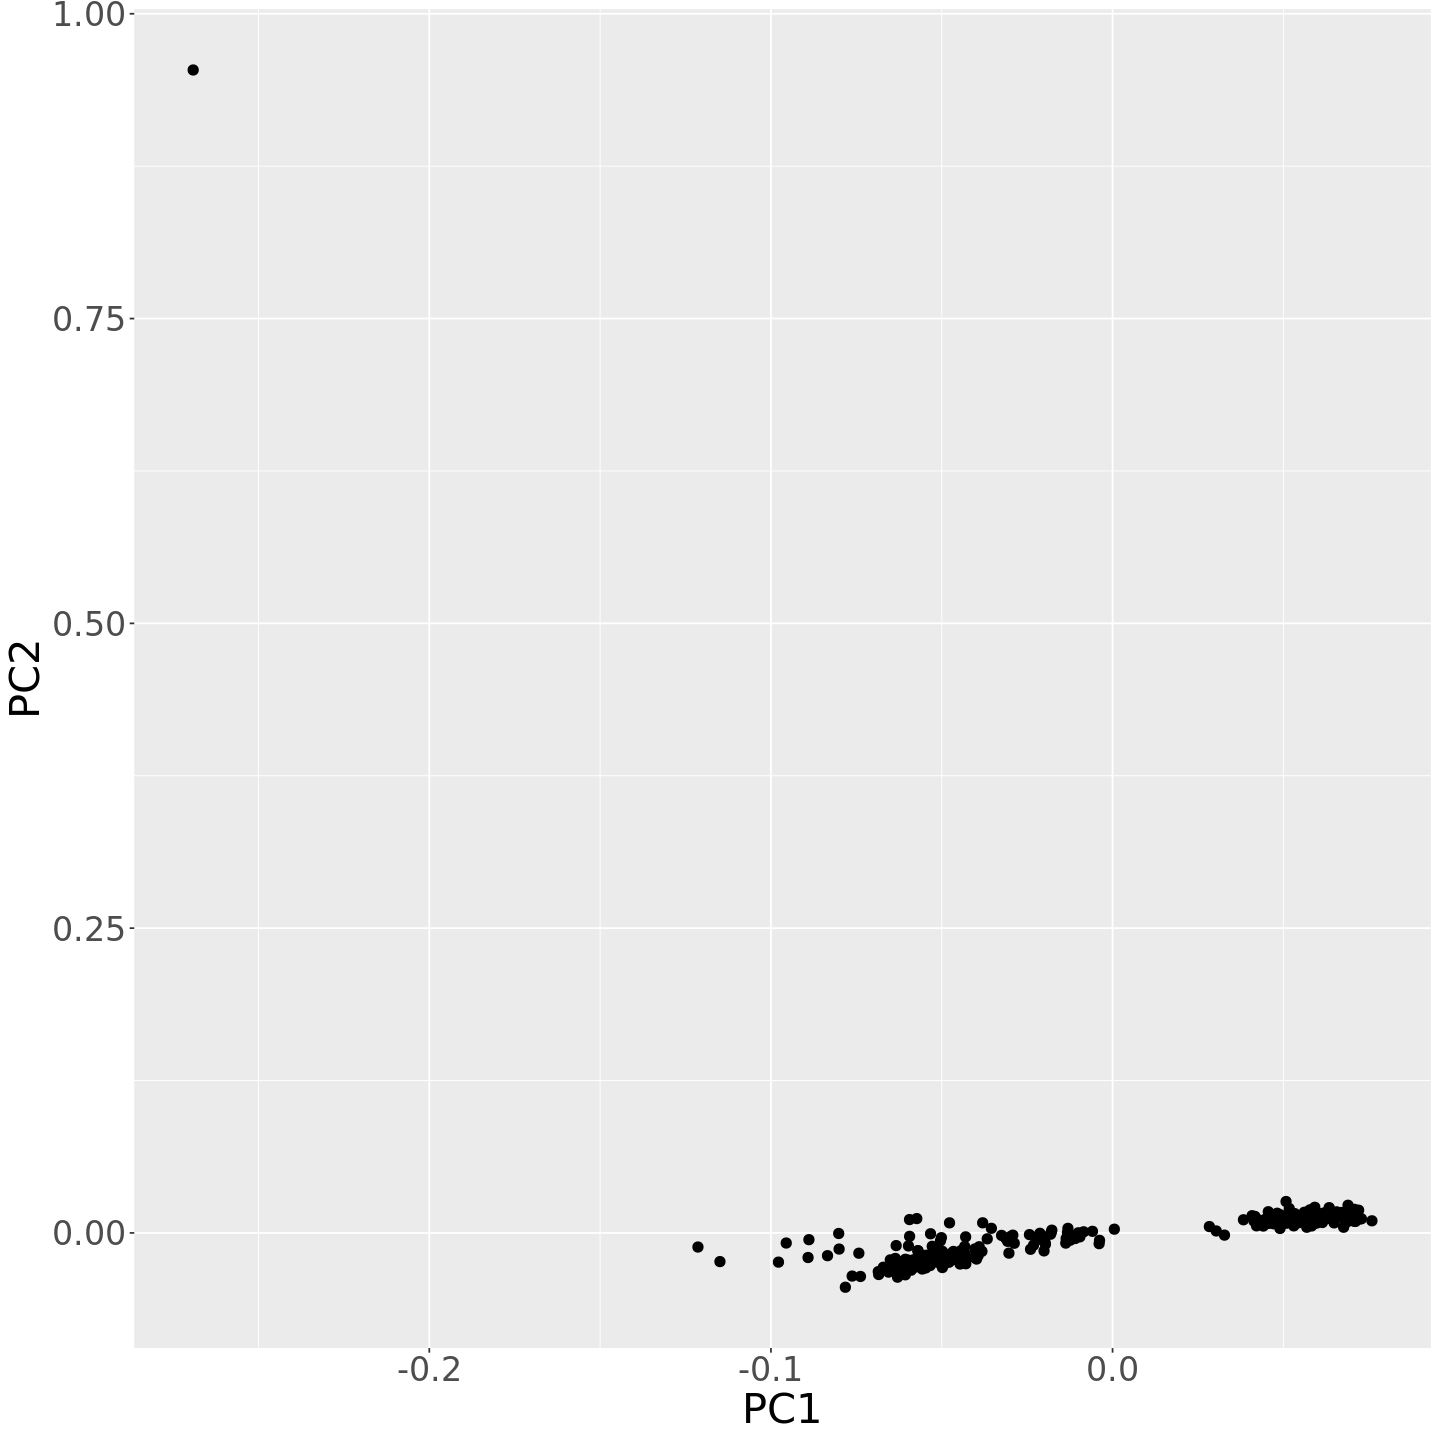

In [10]:
options(repr.plot.width=12, repr.plot.height=12)

data %>%
    ggplot(aes(x=PC1, y=PC2)) +
    geom_point(size=2.5) +
    theme(text = element_text(size = 25), legend.key.size = unit(1.5, 'cm'))